In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('C:/InternshipProj/who_suicide_statistics.csv')

data = data.sort_values(['year'], ascending = True)

print(data.shape)
data.columns

(43776, 6)


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [3]:
# let's check the total number of countries' data available for suicidal analysis

print("No. of Countries available for analysis :", data['country'].nunique())

No. of Countries available for analysis : 141


In [4]:
# renaming the columns

data.rename({'sex' : 'gender', 'suicides_no' : 'suicides'}, inplace = True, axis = 1)

data.columns

Index(['country', 'year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [5]:
# checkinng the null values in the dataset

data.isnull().sum()

country          0
year             0
gender           0
age              0
suicides      2256
population    5460
dtype: int64

In [6]:
# filling missing values

data['suicides'].fillna(0, inplace = True)
# data['population'].mean()
data['population'].fillna(1664090, inplace = True)

# checking if there is any null value left
data.isnull().sum().sum()

# converting these attributes into integer format
data['suicides'] = data['suicides'].astype(int)
data['population'] = data['population'].astype(int)

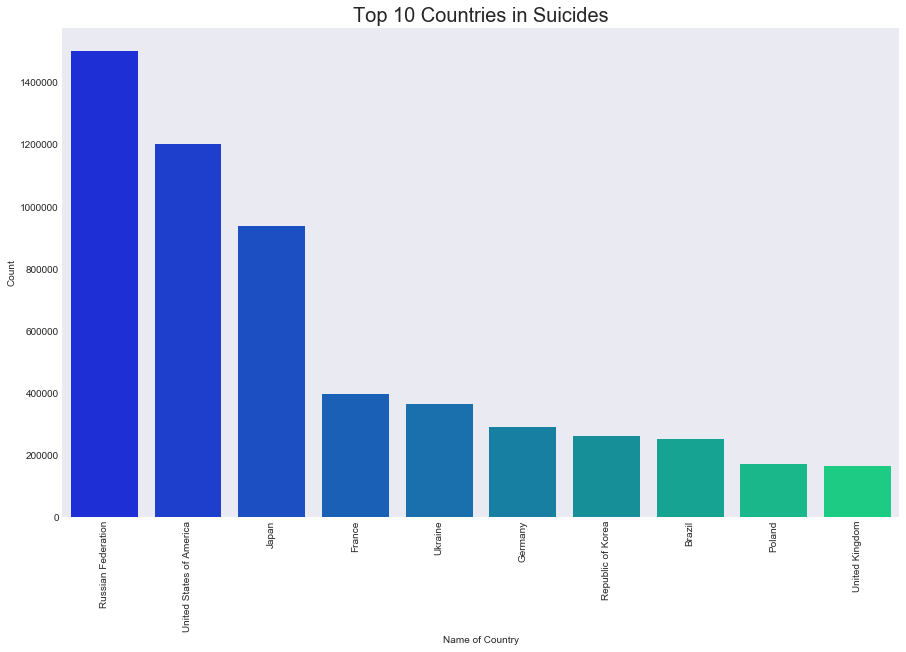

In [7]:
#visualising the different countries distribution in the dataset

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (15, 9)

color = plt.cm.winter(np.linspace(0, 10, 100))
x = pd.DataFrame(data.groupby(['country'])['suicides'].sum().reset_index())
x.sort_values(by = ['suicides'], ascending = False, inplace = True)

sns.barplot(x['country'].head(10), y = x['suicides'].head(10), data = x, palette = 'winter')
plt.title('Top 10 Countries in Suicides', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

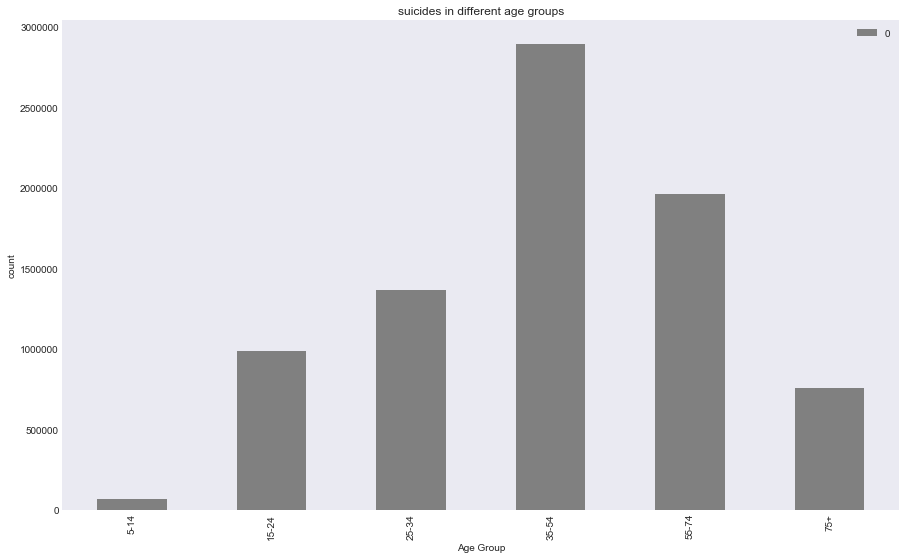

In [8]:
# replacing categorical values in the age column

data['age'] = data['age'].replace('5-14 years', 0)
data['age'] = data['age'].replace('15-24 years', 1)
data['age'] = data['age'].replace('25-34 years', 2)
data['age'] = data['age'].replace('35-54 years', 3)
data['age'] = data['age'].replace('55-74 years', 4)
data['age'] = data['age'].replace('75+ years', 5)

#data['age'].value_counts()

# suicides in different age groups

x1 = data[data['age'] == 0]['suicides'].sum()
x2 = data[data['age'] == 1]['suicides'].sum()
x3 = data[data['age'] == 2]['suicides'].sum()
x4 = data[data['age'] == 3]['suicides'].sum()
x5 = data[data['age'] == 4]['suicides'].sum()
x6 = data[data['age'] == 5]['suicides'].sum()

x = pd.DataFrame([x1, x2, x3, x4, x5, x6])
x.index = ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']
x.plot(kind = 'bar', color = 'grey')

plt.title('suicides in different age groups')
plt.xlabel('Age Group')
plt.ylabel('count')
plt.show()


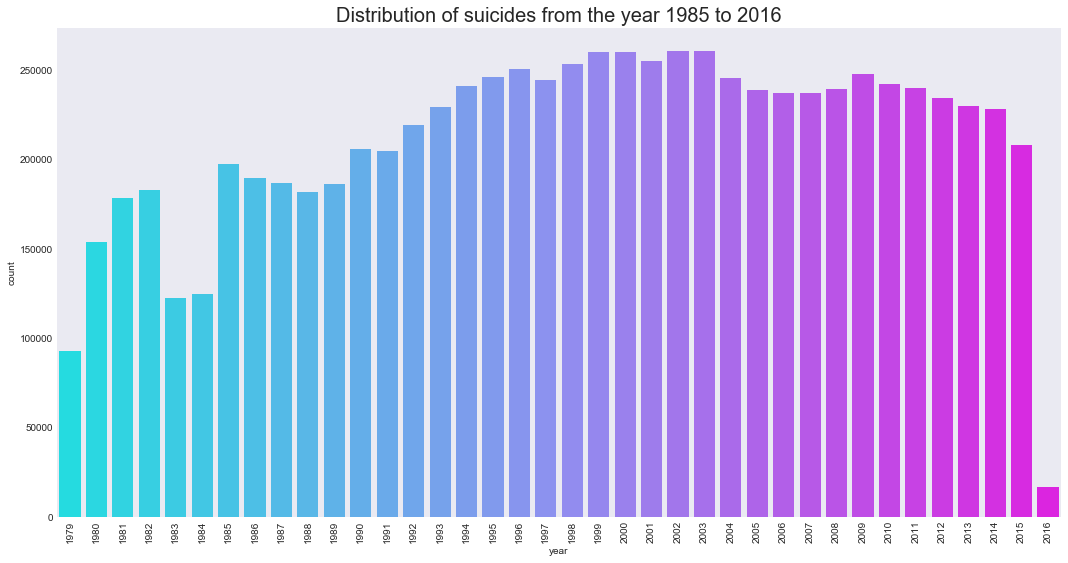

In [9]:
# visualising the different year distribution in the dataset

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (18, 9)

x = pd.DataFrame(data.groupby(['year'])['suicides'].sum().reset_index())
x.sort_values(by = ['suicides'], ascending = False, inplace = True)

sns.barplot(x['year'], y = x['suicides'], data = x, palette = 'cool')
plt.title('Distribution of suicides from the year 1985 to 2016', fontsize = 20)
plt.xlabel('year')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()

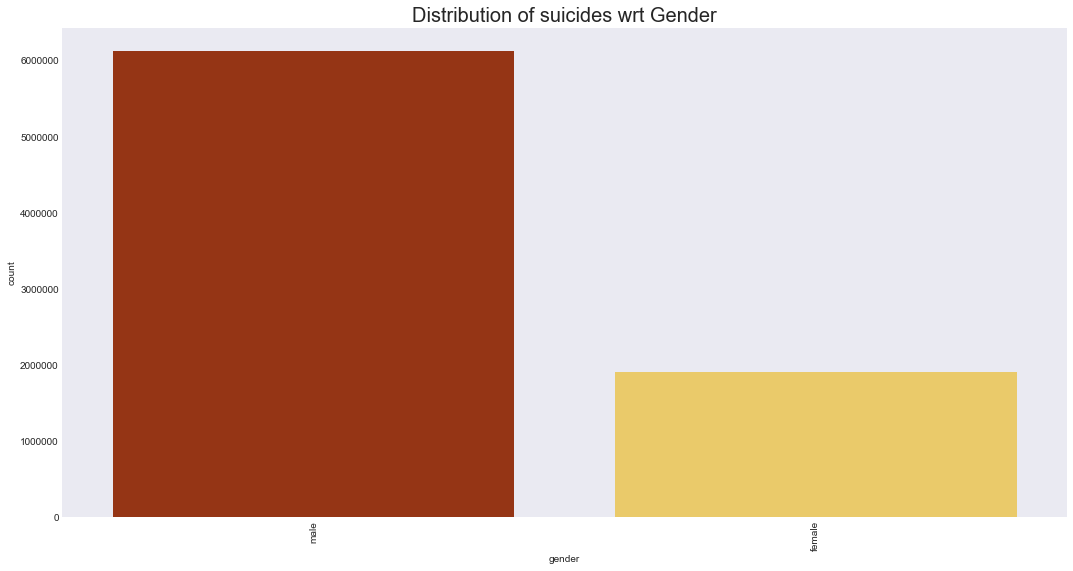

In [10]:
# visualising the different year distribution in the dataset

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (18, 9)

x = pd.DataFrame(data.groupby(['gender'])['suicides'].sum().reset_index())
x.sort_values(by = ['suicides'], ascending = False, inplace = True)

sns.barplot(x['gender'], y = x['suicides'], data = x, palette = 'afmhot')
plt.title('Distribution of suicides wrt Gender', fontsize = 20)
plt.xlabel('gender')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()


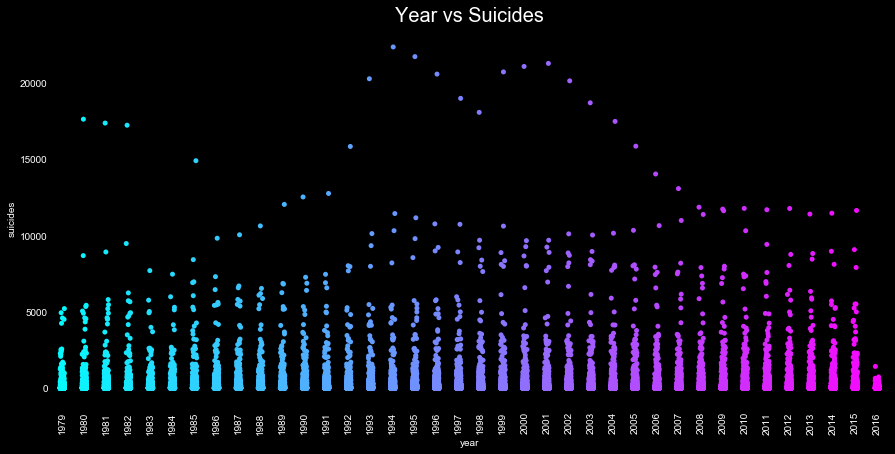

In [11]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('dark_background')

sns.stripplot(data['year'], data['suicides'], palette = 'cool')
plt.title('Year vs Suicides', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

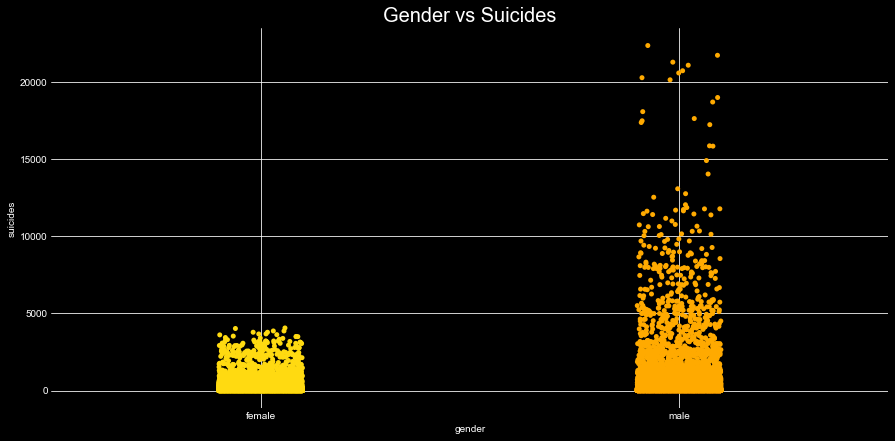

In [12]:
# age-group vs suicides

plt.rcParams['figure.figsize'] = (15, 7)


sns.stripplot(data['gender'], data['suicides'], palette = 'Wistia')
plt.title('Gender vs Suicides', fontsize = 20)
plt.grid()
plt.show()

In [13]:
#label encoding for gender

from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

data['gender'].value_counts()

1    21888
0    21888
Name: gender, dtype: int64

In [14]:
# deleting unnecassary column

data = data.drop(['country'], axis = 1)

data.columns

Index(['year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [18]:
#splitting the data into dependent and independent variables
print(x.shape)
print(y.shape)

x = data.drop(['suicides'], axis = 1)
y = data['suicides']

print(x.shape)
print(y.shape)

(43776, 4)
(43776,)
(43776, 4)
(43776,)


In [19]:
#splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.25, random_state = 45)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32832, 4)
(32832,)
(10944, 4)
(10944,)


In [20]:
# min max scaling

import warnings
warnings.filterwarnings('ignore')

# importing the min max scaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# scaling the independent variables
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# creating the model
model = LinearRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 361228.5902647017
RMSE : 601.0229531928891
r2_score : 0.3837302593217645


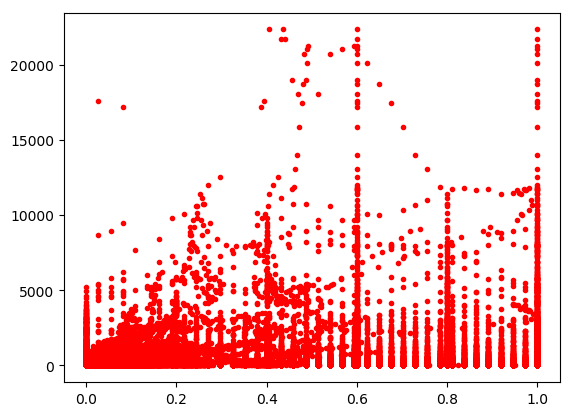

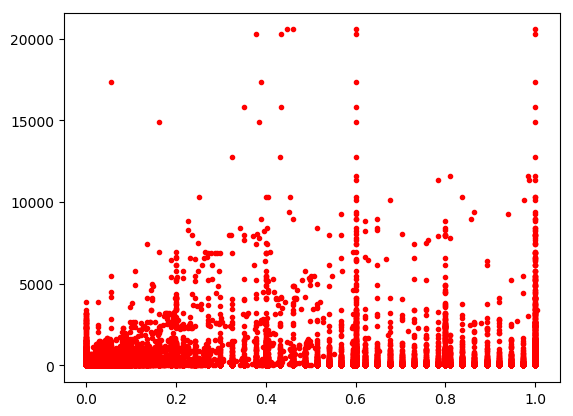

In [22]:
plt.style.use('default')
plt.plot(x_train, y_train, 'r.')
plt.show()
plt.plot(x_test, y_test, 'r.')
plt.show()